In [113]:
import numpy as np
import torch.distributions as td
import torch.distributions.transforms as t
from matplotlib import pyplot as plt
import torch
from torch.autograd import Variable

In [120]:
class LeakyReLU(t.Transform):
    
    domain = td.constraints.real
    codomain = td.constraints.real
    bijective = True
    
    def __init__(self, alpha=0.5, validate_args=False, name="leaky_relu"):
        super().__init__(cache_size=0)
        
        self.alpha = Variable(torch.tensor([float(alpha)]), requires_grad=True)

    def _call(self, x):
        return torch.where(torch.greater_equal(x, 0), x, self.alpha * x)

    def _inverse(self, y):
        return torch.where(torch.greater_equal(y, 0), y, 1. / self.alpha * y)

    def log_abs_det_jacobian(self, y):
        event_dims = y.dim()
        I = torch.ones_like(y)
        J_inv = torch.where(torch.greater_equal(y, 0), I, 1.0 / self.alpha * I)
        # abs is actually redundant here, since this det Jacobian is > 0
        log_abs_det_J_inv = torch.log(torch.abs(J_inv))
        return torch.reduce_sum(log_abs_det_J_inv, axis=event_dims)

In [128]:
a = 0
b = 1

base_distribution = td.Normal(0, 1)
transforms = [LeakyReLU(alpha=0.5), td.AffineTransform(loc=a, scale=b), td.AffineTransform(loc=a+1, scale=b*6)]
logistic = td.TransformedDistribution(base_distribution, transforms)

(array([  7.,  45., 178., 303., 158., 143.,  97.,  39.,  25.,   5.]),
 array([-9.543701 , -6.780175 , -4.0166492, -1.2531233,  1.5104027,
         4.2739286,  7.0374546,  9.800981 , 12.564507 , 15.3280325,
        18.091558 ], dtype=float32),
 <a list of 10 Patch objects>)

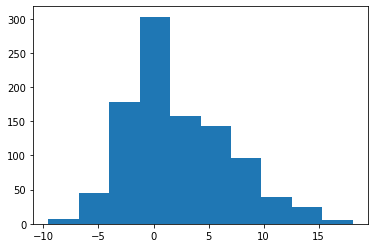

In [129]:
plt.hist(logistic.sample((1000,)))

In [131]:
LeakyReLU(alpha=0.5).alpha

tensor([0.5000], requires_grad=True)

In [71]:
t.AffineTransform.domain

DependentProperty()